In [1]:
import numpy as np
import matplotlib.pyplot as plt
from layer import DenseLayer, ActivationLayer, FlattenLayer, SoftmaxLayer
from activation import relu
from loss import cross_entropy
from utils import load_mnist, train_one_epoch, evaluate

In [2]:
x_train, y_train, x_test, y_test = load_mnist()

x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:1000]
y_test = y_test[:1000]


In [3]:
np.random.seed(42)
network = [
    DenseLayer(28*28, 100),
    ActivationLayer(relu),
    DenseLayer(100, 100),
    ActivationLayer(relu),
    DenseLayer(100, 10),
    SoftmaxLayer(10)
]

loss_ep = []
tr_acc_ep = []
te_acc_ep = []
epochs = 25
lr = 0.001
bs = 64
print(f'Sanity Check: test_acc={evaluate(network, x_test, y_test)}')
for epoch in range(epochs):
    network, loss = train_one_epoch(network, x_train, y_train, cross_entropy, lr, batch_size=bs)
    tr_acc = evaluate(network, x_train, y_train, batch_size=bs)
    te_acc = evaluate(network, x_test, y_test, batch_size=bs)
    loss_ep.append(loss)
    tr_acc_ep.append(tr_acc)
    te_acc_ep.append(te_acc)
    print(f'[{epoch + 1}/{epochs}] loss={loss:.6f}, train_acc={tr_acc:.6f}, test_acc={te_acc:.6f}')


Sanity Check: test_acc=0.091
[1/25] loss=0.226453, train_acc=0.383000, test_acc=0.298000
[2/25] loss=0.211839, train_acc=0.556000, test_acc=0.487000
[3/25] loss=0.187039, train_acc=0.634000, test_acc=0.575000
[4/25] loss=0.150832, train_acc=0.722000, test_acc=0.646000
[5/25] loss=0.114991, train_acc=0.780000, test_acc=0.691000
[6/25] loss=0.089781, train_acc=0.816000, test_acc=0.719000
[7/25] loss=0.073971, train_acc=0.836000, test_acc=0.738000
[8/25] loss=0.063629, train_acc=0.855000, test_acc=0.749000
[9/25] loss=0.056313, train_acc=0.873000, test_acc=0.767000
[10/25] loss=0.050781, train_acc=0.877000, test_acc=0.780000
[11/25] loss=0.046398, train_acc=0.884000, test_acc=0.782000
[12/25] loss=0.042814, train_acc=0.890000, test_acc=0.787000
[13/25] loss=0.039772, train_acc=0.903000, test_acc=0.793000
[14/25] loss=0.037151, train_acc=0.907000, test_acc=0.796000
[15/25] loss=0.034812, train_acc=0.907000, test_acc=0.799000
[16/25] loss=0.032745, train_acc=0.914000, test_acc=0.804000
[17/

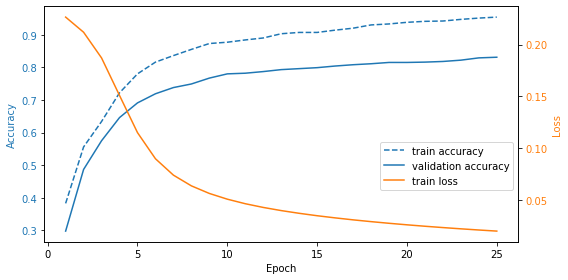

In [4]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(range(1,epochs+1),tr_acc_ep, '--',c='tab:blue',label='train accuracy')
ax1.plot(range(1,epochs+1),te_acc_ep, '-',c='tab:blue',label='validation accuracy')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Epoch')
ax2 = ax1.twinx()
ax2.plot(range(1,epochs+1),loss_ep,'-',c='tab:orange', label='train loss')
ax2.set_ylabel('Loss',color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', bbox_to_anchor=(1,0.2))
fig.tight_layout()
plt.show()